## **Foreword**

##### Last change: 9. February 2022

### This script provides some statistics on the data set.

In [3]:
# Import general stuff
import os, re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Parameters for histograms
parameters = ["ctHb", "fO2Hb", "fHHb", "fCOHb", "fMetHb", "Hematocrit", "Osmolarity"]

In [5]:
# Allocate memory for file list
filelist = list()

# Search for '*.oxy' files in directories
for file in os.listdir("../data/train"):
    if file.endswith(".oxy"):
        path = os.path.join("../data/train", file)
        filelist.append(path)

# Count number of '*.oxy' files
numFiles = len(filelist)

# Additional information
print(str(numFiles) + " samples in train set")

358 samples in train set


In [6]:
# Allocate memory for reference values; each line represents one measurement and columns represent reference values
values = np.zeros((numFiles, len(parameters)))

# Generate list of file names
filenames = [file for file in filelist]

# Loop through measurement files
for index in range(0, numFiles):
    # Get name of current file
    filename = filenames[index]

    # Open text file read-only
    with open(filename, "rt") as f:
        # Loop through lines in current measurement file
        for line in f:
            # Loop through parameter list
            for parameter in range(0, len(parameters)):
                # Total hemoglobin concentration is handled in a different way
                if parameters[parameter] == "ctHb":
                    # Extract value for total hemoglobin concentration and convert to d/L
                    value = re.findall('  ' + parameters[parameter] + ": (\d+\.\d+) g/dL", line)
                # Hematocrit is handled in a different way
                elif parameters[parameter] == "Hematocrit":
                    # Extract value for hematocrit
                    value = re.findall('  ' + parameters[parameter] + ": (\d+\.\d+)", line)
                # Osmolarity is handled in a different way
                elif parameters[parameter] == "Osmolarity":
                    # Extract value for osmolarity
                    value = re.findall('  ' + parameters[parameter] + ": (\d+) mOsm/L", line)
                else:
                    # Extract value for other parameters
                    value = re.findall('  ' + parameters[parameter] + ": (\d+\.\d+) %", line)

                # Value exists?
                if value:
                    # Save current value to data matrix
                    values[index, parameter] = float(value[0])

# Convert total hemoglobin concentration from g/dL to g/L
values[:, parameters.index("ctHb")] *= 10

In [9]:
# Show all reference values
np.set_printoptions(threshold=np.inf, precision=3, suppress=True)
print(values)

[[ 39.     98.4     0.      1.3     0.4     0.132 314.   ]
 [ 40.     98.7     0.      1.7     0.      0.136 314.   ]
 [ 45.     98.5     0.1     1.2     0.2     0.148 314.   ]
 [ 47.     98.2     0.      1.3     0.5     0.155 314.   ]
 [ 49.     98.5     0.      1.7     0.1     0.165 314.   ]
 [ 81.     34.3    63.8     1.1     0.9     0.297 314.   ]
 [ 51.     98.3     0.      1.5     0.4     0.17  314.   ]
 [ 53.     98.      0.      1.4     0.6     0.177 314.   ]
 [ 31.     97.7     0.      0.9     1.4     0.097 314.   ]
 [ 35.     99.      0.      2.1     0.      0.108 314.   ]
 [ 25.     99.3     0.      1.1     0.      0.082 314.   ]
 [ 58.     97.9     0.3     1.      0.8     0.199 314.   ]
 [107.     98.1     0.2     1.5     0.2     0.372 314.   ]
 [ 73.     98.4     0.      1.4     0.2     0.246 314.   ]
 [ 95.     27.8     0.      2.1    70.2     0.333 314.   ]
 [ 37.     97.9     0.      1.2     1.1     0.107 314.   ]
 [ 39.     97.8     0.      1.2     1.      0.127 314.  

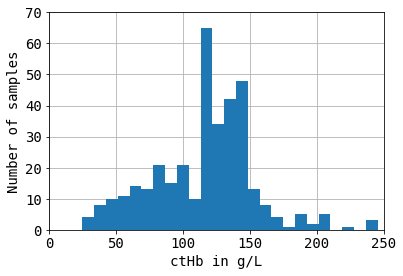

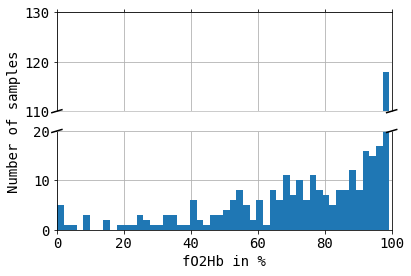

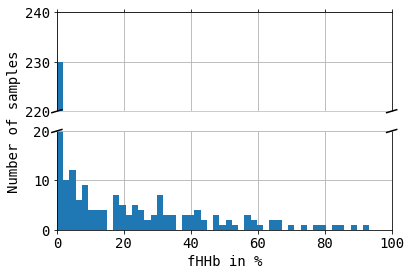

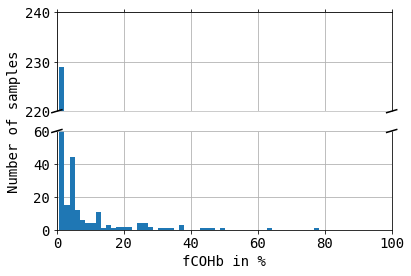

In [10]:
# Loop through parameters
for parameter in range(0, len(parameters)):
    # Set default figure font
    font = {'family' : 'monospace', 'weight' : 'normal', 'size' : 14}

    # Change figure font
    plt.rc('font', **font)

    # Hematocrit has a different axis limits and labels
    if parameters[parameter] == "Hematocrit":
        # Set axis limits for hematocrit
        limits = [0.0, 0.8]

        # Set binning width for hematocrit
        binning = 0.02;

        # Create two subplots
        fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
        ax.hist(values[:, parameter], bins=int(limits[1]/binning))
        ax2.hist(values[:, parameter], bins=int(limits[1]/binning))

        # Set limits for axes
        ax.set_ylim(80, 90)
        ax2.set_ylim(0, 40)

        # Hide the spines between ax and ax2
        ax.spines['bottom'].set_visible(True)
        ax.spines['bottom'].set_color('silver')
        ax.xaxis.tick_top()
        ax2.spines['top'].set_visible(True)
        ax2.spines['top'].set_color('silver')
        ax2.tick_params(labeltop='off')
        ax2.xaxis.tick_bottom()

        # Size of diagonal lines in axes coordinates
        d = .015

        # Arguments to pass to plot, just so we don't keep repeating them
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((-d, +d), (-d, +d), **kwargs, zorder=100)        # top-left diagonal
        ax.plot((1 - d, 1 + d), (-d, +d), **kwargs, zorder=100)  # top-right diagonal

        kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs, zorder=100)  # bottom-left diagonal
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, zorder=100)  # bottom-right diagonal

        # Set x-axis label
        plt.xlabel("Hematocrit")

        # Enable grids
        ax.grid(True)
        ax.set_axisbelow(True)
        ax2.grid(True)
        ax2.set_axisbelow(True)

        # Set y-axis label
        fig.text(0.01, 0.5, "Number of samples", va="center", rotation="vertical")
    # Osmolarity has a different axis limits and labels
    elif parameters[parameter] == "Osmolarity":
        # Set axis limits for osmotic concentration
        limits = [250.0, 400.0]

        # Set binning width for osmotic concentration
        binning = 10;

        # Create two subplots
        fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
        ax.hist(values[:, parameter], bins=int(limits[1]/binning))
        ax2.hist(values[:, parameter], bins=int(limits[1]/binning))

        # Set limits for axes
        ax.set_ylim(200, 220)
        ax2.set_ylim(0, 60)

        # Hide the spines between ax and ax2
        ax.spines['bottom'].set_visible(True)
        ax.spines['bottom'].set_color('silver')
        ax.xaxis.tick_top()
        ax2.spines['top'].set_visible(True)
        ax2.spines['top'].set_color('silver')
        ax2.tick_params(labeltop='off')
        ax2.xaxis.tick_bottom()

        # Size of diagonal lines in axes coordinates
        d = .015

        # Arguments to pass to plot, just so we don't keep repeating them
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((-d, +d), (-d, +d), **kwargs, zorder=100)        # top-left diagonal
        ax.plot((1 - d, 1 + d), (-d, +d), **kwargs, zorder=100)  # top-right diagonal

        kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs, zorder=100)  # bottom-left diagonal
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, zorder=100)  # bottom-right diagonal

        # Set x-axis label
        plt.xlabel("Osmotic concentration in mOsm/L")

        # Enable grids
        ax.grid(True)
        ax.set_axisbelow(True)
        ax2.grid(True)
        ax2.set_axisbelow(True)

        # Set y-axis label
        fig.text(0.01, 0.5, "Number of samples", va="center", rotation="vertical")
    # Total hemoglobin concentration has a different axis limits and labels
    elif parameters[parameter] == "ctHb":
        # Set axis limits for total hemoglobin concentration
        limits = [0.0, 250.0]

        # Set binning width for total hemoglobin concentration
        binning = 10.0;

        # Create plot
        fig, ax = plt.subplots(1, 1)
        ax.hist(values[:, parameter], bins=int(limits[1]/binning))

        # Set axis limits
        plt.axis([0.0, 250.0, 0.0, 70.0])

        # Set x-axis label
        plt.xlabel("ctHb in g/L")

        # Set y-axis label
        plt.ylabel("Number of samples")

        # Enable grid
        ax.grid(True)
        ax.set_axisbelow(True)
    else:
        # Set axis limits for osmotic concentration
        limits = [0.0, 100.0]

        # Set binning width for osmotic concentration
        binning = 2;

        # Create two subplots
        fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
        ax.hist(values[:, parameter], bins=int(limits[1]/binning))
        ax2.hist(values[:, parameter], bins=int(limits[1]/binning))

        # Hide the spines between ax and ax2
        ax.spines['bottom'].set_visible(True)
        ax.spines['bottom'].set_color('silver')
        ax.xaxis.tick_top()
        ax2.spines['top'].set_visible(True)
        ax2.spines['top'].set_color('silver')
        ax2.tick_params(labeltop='off')
        ax2.xaxis.tick_bottom()

        # Oxygenated hemoglobin has a different axis limits and labels
        if parameters[parameter] == "fO2Hb":
            # Set limits for axes
            ax.set_ylim(110, 130)
            ax2.set_ylim(0, 20)
        # Reduced hemoglobin has a different axis limits and labels
        elif parameters[parameter] == "fHHb":
            # Set limits for axes
            ax.set_ylim(220, 240)
            ax2.set_ylim(0, 20)
        # Carboxyhemoglobin has a different axis limits and labels
        elif parameters[parameter] == "fCOHb":
            # Set limits for axes
            ax.set_ylim(220, 240)
            ax2.set_ylim(0, 60)
        # Methemoglobin has a different axis limits and labels
        elif parameters[parameter] == "fMetHb":
            # Set limits for axes
            ax.set_ylim(270, 290)
            ax2.set_ylim(0, 20)

        # Size of diagonal lines in axes coordinates
        d = .015

        # Arguments to pass to plot, just so we don't keep repeating them
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((-d, +d), (-d, +d), **kwargs, zorder=100)        # top-left diagonal
        ax.plot((1 - d, 1 + d), (-d, +d), **kwargs, zorder=100)  # top-right diagonal

        kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs, zorder=100)  # bottom-left diagonal
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, zorder=100)  # bottom-right diagonal

        # Set x-axis label
        plt.xlabel(parameters[parameter] + " in %")

        # Enable grids
        ax.grid(True)
        ax.set_axisbelow(True)
        ax2.grid(True)
        ax2.set_axisbelow(True)

        # Set y-axis label
        fig.text(0.01, 0.5, "Number of samples", va="center", rotation="vertical")

    # Set x-axis limits
    plt.xlim(limits)

    if not os.path.exists("../figures"):
        os.makedirs("../figures")

    # Export figure to PDF file
    plt.savefig("../figures/" + parameters[parameter] + "_histogram.pdf")    

    # Finally show figure
    plt.show(block = True)

In [11]:
# Get number of samples with physiological haematocrit
np.set_printoptions(precision=1)
data = values[:, parameters.index("Hematocrit")]
print(data)
print(((data >= 0.37) & (data <= 0.54)).sum() / len(data) * 100)

# Get number of samples with physiological total haemoglobin concentration
np.set_printoptions(precision=1)
data = values[:, parameters.index("ctHb")]
print(data)
print(((data >= 120) & (data <= 180)).sum() / len(data) * 100)

# Get number of samples with physiological osmotic concentration
np.set_printoptions(precision=1)
data = values[:, parameters.index("Osmolarity")]
print(data)
print(((data >= 280) & (data <= 296)).sum() / len(data) * 100)

[0.1 0.1 0.1 0.2 0.2 0.3 0.2 0.2 0.1 0.1 0.1 0.2 0.4 0.2 0.3 0.1 0.1 0.1
 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.2 0.3 0.4 0.5 0.5 0.5
 0.5 0.5 0.6 0.7 0.6 0.6 0.7 0.7 0.2 0.3 0.3 0.5 0.3 0.2 0.3 0.3 0.3 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5
 0.4 0.4 0.4 0.4 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.5 0.5 0.5
 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.4 0.3 0.3
 0.3 0.3 0.4 0.3 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.5 0.5 0.5 0.5
 0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.3
 0.5 0.5 0.5 0.3 0.3 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.5 0.5 0.3 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.4 0.4 0.4 0.5 0.2 0.2 0.4 0.3 0.3 0.3 0.4
 0.4 0.4 0.5 0.5 0.4 0.4 0.5 0.5 0.2 0.2 0.3 0.3 0.

In [12]:
# Get number of samples with physiological carboxyhaemoglobin
np.set_printoptions(precision=1)
data = values[:, parameters.index("fCOHb")]
print(data)
print(((data <= 2)).sum() / len(data) * 100)

[ 1.3  1.7  1.2  1.3  1.7  1.1  1.5  1.4  0.9  2.1  1.1  1.   1.5  1.4
  2.1  1.2  1.2  0.9  1.6  1.3  1.1  1.1  1.2  1.4  1.3  1.3  1.1  1.2
  1.4  1.9  1.6  1.6  1.5  1.6  1.5  1.5  1.4  1.4  1.5  1.5  1.2  1.6
  1.4  1.5  1.2  1.5  1.5  1.5  1.6  1.5  1.6  1.7  2.3  1.6  1.6  0.9
  0.8  2.1  0.8  3.   1.7  1.4  1.4  0.9  0.8  1.6  1.6  1.9  1.2  1.5
  1.5  1.4  1.4  1.5  1.5  1.3  1.5  1.4  1.3  1.7  1.4  1.6  1.6  1.5
 10.9 18.1 78.3  1.6  1.4  1.6  1.5  1.4  1.8  6.9 16.  25.5 34.2 12.3
  2.   5.7 12.7 24.9  1.7  5.7  7.6  9.  12.9 16.  26.  30.8 26.4 37.8
  6.6  9.5 12.5 12.8 16.8 18.9 27.6 37.6 49.9  5.7 25.5 26.1  1.1  0.7
  1.   1.  43.2  1.   3.5  3.2  4.8  1.1  1.1  1.1  1.   1.1  1.1  1.1
  1.1  1.2  4.2  7.7  5.   5.7 12.6  7.6 63.3 26.6 21.3  6.4 46.6  3.2
  7.1 11.2 20.6 33.  44.5  1.1  1.2  1.1  1.1  1.1  1.   1.2  1.1  4.2
  4.9  5.   5.   4.9  4.8  4.9  4.8  4.8  4.7  4.9  4.9  4.8  4.8  4.7
  4.5  4.5  4.5  4.2  4.1  4.   4.8  4.   4.   4.3  4.2  5.5  4.5  4.2
  3.9 

In [13]:
# Get number of samples with physiological haemiglobin
np.set_printoptions(precision=1)
data = values[:, parameters.index("fMetHb")]
print(data)
print(((data <= 1)).sum() / len(data) * 100)

[ 0.4  0.   0.2  0.5  0.1  0.9  0.4  0.6  1.4  0.   0.   0.8  0.2  0.2
 70.2  1.1  1.   0.7  0.5  0.3  0.9  0.6  0.5  0.4  0.4  0.5  0.7  0.4
  0.5  0.7  0.   0.2  0.3  0.2  0.2  0.3  0.3  0.3  0.3  0.3  0.4  0.2
  0.3  0.2  0.4  0.   0.3  0.3  0.2  0.1  0.3  0.9 12.9  0.4  2.8 20.5
 31.8 44.2  9.8 74.1  0.7 17.8 26.  13.4 10.7  1.2  2.6  3.9  4.9  5.3
  0.4  1.3  2.5  3.3  4.   4.4  4.6  0.6  0.9  1.   0.7  0.7  0.8  0.5
  0.2  0.4  0.3  0.8  0.4  0.8  0.7  0.6  0.3  0.2  0.3  0.2  0.2  0.4
  0.2  0.4  0.4  0.4  0.3  0.5  0.4  0.5  0.3  0.3  0.3  0.5  0.5  0.4
  0.1  0.3  0.1  0.4  0.3  0.4  0.4  0.4  0.4  0.4  0.3  0.4  0.5  1.
  0.4  0.6  0.3  0.8  0.4  0.3  0.3  0.4  0.3  0.4  0.6  0.5  0.5  0.7
  0.5  0.7  0.5  0.4  0.4  0.3  0.5  0.4  0.4  0.3  0.3  0.3  0.2  0.2
  0.4  0.2  0.3  0.3  0.3  1.4  5.1 10.4  2.2  4.9  9.3  1.1  5.5  0.2
  0.7  0.7  0.5  0.6  0.5  0.9  0.9  0.4  0.5  0.5  0.6  0.9  0.6  0.8
  0.3  0.2  5.  13.3 29.1 22.9 37.1  9.5 13.3  3.2 29.6 46.4  1.6  7.7
 19.8 2